# Actividad 2. Valores faltantes y análisis preliminar de los datos

Intregantes:

Jose Vargas

Astrid Tello

Tanya Vitonera

### 1. Utiliza el siguiente enlace para descargar el Census Income Dataset, junto con su fichero de nombres. Utiliza un Jupyter Notebook y el paquete Pandas para abrir el archivo y presentarlo en formato DataFrame, donde el nombre de las columnas debe corresponder con el nombre real de las variables.


In [1]:
import pandas as pd
import numpy as np

# Para la visualización de datos
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score

warnings.filterwarnings("ignore")
import copy

# Estilo para las gráficas
plt.style.use("ggplot")
rcParams['figure.figsize'] = (12,  6)

In [2]:
df=pd.read_csv('adult.data.csv', sep=(','), header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','target']

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**a. Como se ha visto en actividades anteriores, los valores de las variables en
este DataFrame tienen un espacio vacío al comienzo del string que define la
variable. La presencia de este espacio vacío dificulta el trabajo de análisis y
puede crear confusiones en el futuro. Busca información sobre el método
applymap de Pandas y escribe una pequeña descripción de su
funcionamiento. Utiliza el método applymap para limpiar los valores de
cada una de las variables que tengan formato string, eliminando el espacio
vacío que aparece al comienzo del string. Renombra las variables nuevas
para que tengan el mismo nombre que las variables originales.**


El método applymap en Pandas se utiliza para aplicar una función a cada elemento de un DataFrame. A diferencia del método apply, que se aplica a nivel de columna o fila, applymap opera a nivel de cada elemento individual del DataFrame. Este método es especialmente útil cuando se desea aplicar una transformación a todos los elementos de un DataFrame de manera eficiente.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
def limpiar_string(valor):
    if isinstance(valor, str):
        return valor.strip()  # Elimina espacios al comienzo y al final
    else:
        return valor

In [7]:
# Aplica la función a cada elemento del DataFrame usando applymap
df = df.applymap(limpiar_string)
# Ahora, los valores de las variables de tipo string están limpios

In [8]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
# Renombra las variables para que tengan el mismo nombre que las originales
df.columns = [col.strip() if isinstance(col, str) else col for col in df.columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  target          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


b. Crea un DataFrame llamado df_less con los registros del DataFrame original
que cobren menos de 50 mil dólares. Crea un DataFrame llamado df_more
con los registros del DataFrame original que cobren más de 50 mil dólares.

In [10]:
# Crea un diccionario de mapeo para convertir los valores de string a valores numéricos
mapeo_ingresos = {'<=50K': 0, '>50K': 1}

In [11]:
# Aplica el mapeo directamente a la columna 'target'
df['target'] = df['target'].map(mapeo_ingresos)

In [12]:
# Crea un DataFrame llamado df_less con registros que cobren menos de 50 mil dólares
df_less = df[df['target'] == 0]

# Crea un DataFrame llamado df_more con registros que cobren más de 50 mil dólares
df_more = df[df['target'] == 1 ]

In [13]:
df_more.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,1
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,1


In [14]:
df_less.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


**c. Utiliza el método value_counts de Pandas sobre df_less para obtener el
número de registros que cobran menos de 50 mil dólares agrupados por
nivel educativo. Ordena estos resultados de mayor a menor, señalando qué
grupos tienen más incidencia y cuáles menos. Repite las mismas operaciones
sobre el DataFrame df_more. Explica los resultados y comenta si crees que
tienen sentido.**

Luego de realizar el agrupado segun la educacion podemos ver que los que ganan mas de 50mil son los Bachelors. Por el lado de los que ganan menos de 50mil predominan los HS-grad. Los que ganan menos de 50mil estan los de preecolar que ninguno de ellos gana mas de 50mil. Tiene sentido que los graduados Universitarios tengan un mejor salario.


In [15]:
# Para df_less
counts_less = df_less['education'].value_counts().sort_values(ascending=False)

# Para df_more
counts_more = df_more['education'].value_counts().sort_values(ascending=False)

print("Para df_less:")
print(counts_less)

print("\nPara df_more:")
print(counts_more)

Para df_less:
education
HS-grad         8826
Some-college    5904
Bachelors       3134
11th            1115
Assoc-voc       1021
10th             871
Assoc-acdm       802
Masters          764
7th-8th          606
9th              487
12th             400
5th-6th          317
1st-4th          162
Prof-school      153
Doctorate        107
Preschool         51
Name: count, dtype: int64

Para df_more:
education
Bachelors       2221
HS-grad         1675
Some-college    1387
Masters          959
Prof-school      423
Assoc-voc        361
Doctorate        306
Assoc-acdm       265
10th              62
11th              60
7th-8th           40
12th              33
9th               27
5th-6th           16
1st-4th            6
Name: count, dtype: int64


d. Partiendo del DataFrame original y utilizando el método value_counts de
Pandas, obtén el número total de registros del dataset por nivel educativo.
Utiliza este resultado para normalizar los resultados obtenidos en los
apartados b y c.

In [16]:

# Paso 1: Obtener el número total de registros por nivel educativo en el DataFrame original
total_registros_por_nivel_educativo = df['education'].value_counts()

# Paso 2: Para df_less
counts_less = df_less['education'].value_counts()

# Normalizar los resultados dividiendo por el número total de registros por nivel educativo
resultados_normalizados_less = counts_less / total_registros_por_nivel_educativo

# Mostrar los resultados normalizados para df_less
print("Resultados normalizados para df_less:")
print(resultados_normalizados_less)

# Paso 3: Para df_more
counts_more = df_more['education'].value_counts()

# Normalizar los resultados dividiendo por el número total de registros por nivel educativo
resultados_normalizados_more = counts_more / total_registros_por_nivel_educativo

print("\nResultados normalizados para df_more:")
print(resultados_normalizados_more)

Resultados normalizados para df_less:
education
10th            0.933548
11th            0.948936
12th            0.923788
1st-4th         0.964286
5th-6th         0.951952
7th-8th         0.938080
9th             0.947471
Assoc-acdm      0.751640
Assoc-voc       0.738784
Bachelors       0.585247
Doctorate       0.259080
HS-grad         0.840491
Masters         0.443413
Preschool       1.000000
Prof-school     0.265625
Some-college    0.809765
Name: count, dtype: float64

Resultados normalizados para df_more:
education
10th            0.066452
11th            0.051064
12th            0.076212
1st-4th         0.035714
5th-6th         0.048048
7th-8th         0.061920
9th             0.052529
Assoc-acdm      0.248360
Assoc-voc       0.261216
Bachelors       0.414753
Doctorate       0.740920
HS-grad         0.159509
Masters         0.556587
Preschool            NaN
Prof-school     0.734375
Some-college    0.190235
Name: count, dtype: float64


In [17]:
resultados_normalizados_less

education
10th            0.933548
11th            0.948936
12th            0.923788
1st-4th         0.964286
5th-6th         0.951952
7th-8th         0.938080
9th             0.947471
Assoc-acdm      0.751640
Assoc-voc       0.738784
Bachelors       0.585247
Doctorate       0.259080
HS-grad         0.840491
Masters         0.443413
Preschool       1.000000
Prof-school     0.265625
Some-college    0.809765
Name: count, dtype: float64

e. Los resultados normalizados no representan ahora el número de registros por
nivel educativo en cada caso (menos de 50 mil dólares y más de 50 mil
dólares), sino la probabilidad de que un determinado nivel educativo se
encuentre en cada grupo de salario. Ordena las probabilidades de mayor a
menor para cada grupo de salario, señalando la probabilidad asociada a
cada nivel educativo. Explica los resultados y comenta si crees que tienen
sentido.

In [18]:
# Paso 1: Obtener el número total de registros en df_less
total_registros_less = len(df_less)

# Paso 2: Calcular las frecuencias y convertirlas a porcentajes para df_less
probabilidades_less = (df_less['education'].value_counts() / total_registros_less) * 100

# Ordenar las probabilidades de mayor a menor
probabilidades_less = probabilidades_less.sort_values(ascending=False)

# Mostrar las probabilidades para df_less como porcentajes
print("Probabilidades ordenadas (porcentaje) para df_less:")
print(probabilidades_less)

# Paso 3: Obtener el número total de registros en df_more
total_registros_more = len(df_more)

# Paso 4: Calcular las frecuencias y convertirlas a porcentajes para df_more
probabilidades_more = (df_more['education'].value_counts() / total_registros_more) * 100

# Ordenar las probabilidades de mayor a menor
probabilidades_more = probabilidades_more.sort_values(ascending=False)

# Mostrar las probabilidades para df_more como porcentajes
print("\nProbabilidades ordenadas (porcentaje) para df_more:")
print(probabilidades_more)

Probabilidades ordenadas (porcentaje) para df_less:
education
HS-grad         35.703883
Some-college    23.883495
Bachelors       12.677994
11th             4.510518
Assoc-voc        4.130259
10th             3.523463
Assoc-acdm       3.244337
Masters          3.090615
7th-8th          2.451456
9th              1.970065
12th             1.618123
5th-6th          1.282362
1st-4th          0.655340
Prof-school      0.618932
Doctorate        0.432848
Preschool        0.206311
Name: count, dtype: float64

Probabilidades ordenadas (porcentaje) para df_more:
education
Bachelors       28.325469
HS-grad         21.362071
Some-college    17.689070
Masters         12.230583
Prof-school      5.394720
Assoc-voc        4.604005
Doctorate        3.902563
Assoc-acdm       3.379671
10th             0.790715
11th             0.765209
7th-8th          0.510139
12th             0.420865
9th              0.344344
5th-6th          0.204056
1st-4th          0.076521
Name: count, dtype: float64


En esta caso podemos decir que el 28.32% de la muestra con un un sueldo mayor de 50mil Dolares son Bachelors.

Tambien podemos afirmar que el 35.70% de la muestra que gana menos de 50mil son HS-grad. Solo un 0.07% con sueldo de mas de 50mil tiene educacion de 1er a 4to grado, lo cual tiene bastante sentido 

**f. Representa en una gráfica de barras los resultados obtenidos en los
apartados c y e, con los valores ordenados de mayor a menor. Recuerda
añadir los títulos de los ejes, el título del gráfico, la leyenda y todas las
opciones de visualización que consideres relevantes para comunicar mejor
los resultados.**

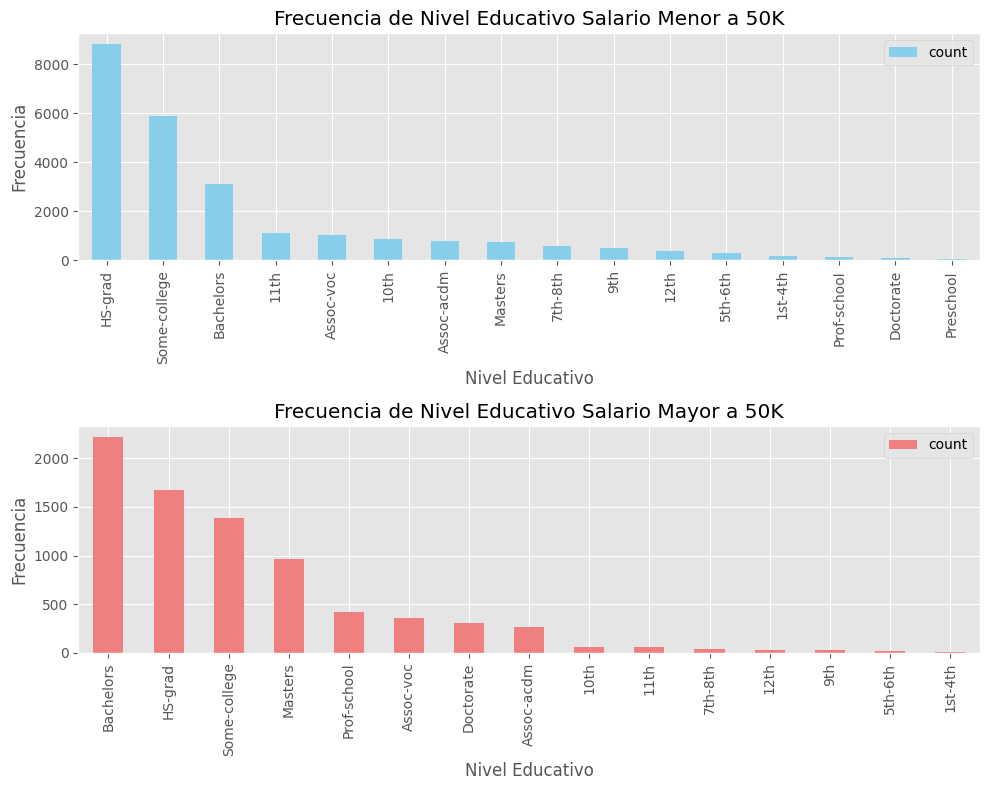

In [19]:
# Crear una figura y ejes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Gráfica para df_less para apartado c.
counts_less.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Frecuencia de Nivel Educativo Salario Menor a 50K')
ax1.set_xlabel('Nivel Educativo')
ax1.set_ylabel('Frecuencia')
ax1.legend()

# Gráfica para df_more para apartado c.
counts_more.plot(kind='bar', ax=ax2, color='lightcoral')
ax2.set_title('Frecuencia de Nivel Educativo Salario Mayor a 50K')
ax2.set_xlabel('Nivel Educativo')
ax2.set_ylabel('Frecuencia')
ax2.legend()

# Ajustes de diseño para mostrar mejor la gráfica
plt.tight_layout()
plt.show()

Para el apartado 'e' se realiza tambien los graficos respectivos.

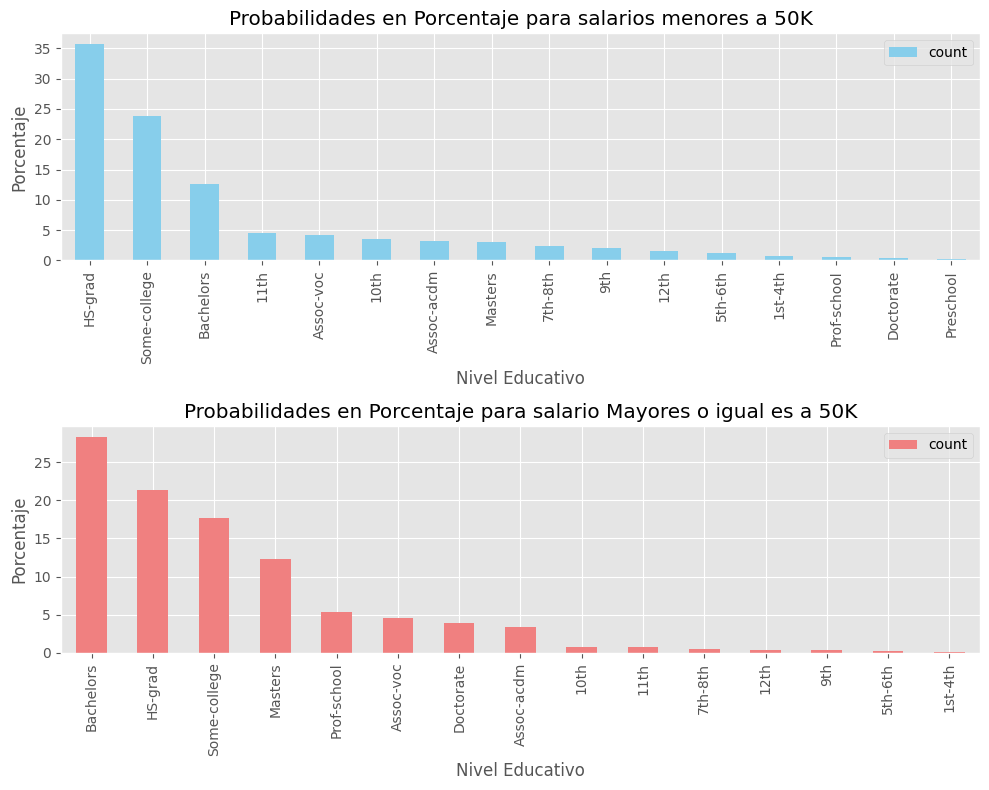

In [20]:
# Crear una figura y ejes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Gráfica para df_less para el apartado e.
probabilidades_less.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Probabilidades en Porcentaje para salarios menores a 50K')
ax1.set_xlabel('Nivel Educativo')
ax1.set_ylabel('Porcentaje')
ax1.legend()

# Gráfica para df_more para el apartado e.
probabilidades_more.plot(kind='bar', ax=ax2, color='lightcoral')
ax2.set_title('Probabilidades en Porcentaje para salario Mayores o igual es a 50K')
ax2.set_xlabel('Nivel Educativo')
ax2.set_ylabel('Porcentaje')
ax2.legend()

# Ajustes de diseño para mostrar mejor la gráfica
plt.tight_layout()
plt.show()

**g. Representa, en el tipo de gráfica que consideres más conveniente, la
manera en la que afecta la edad y el género al hecho de que una persona
se encuentre en el grupo de < 50 mil dólares o de > 50 mil dólares. Añade a
la gráfica todas las opciones de visualización que consideres relevantes para
comunicar los resultados.**

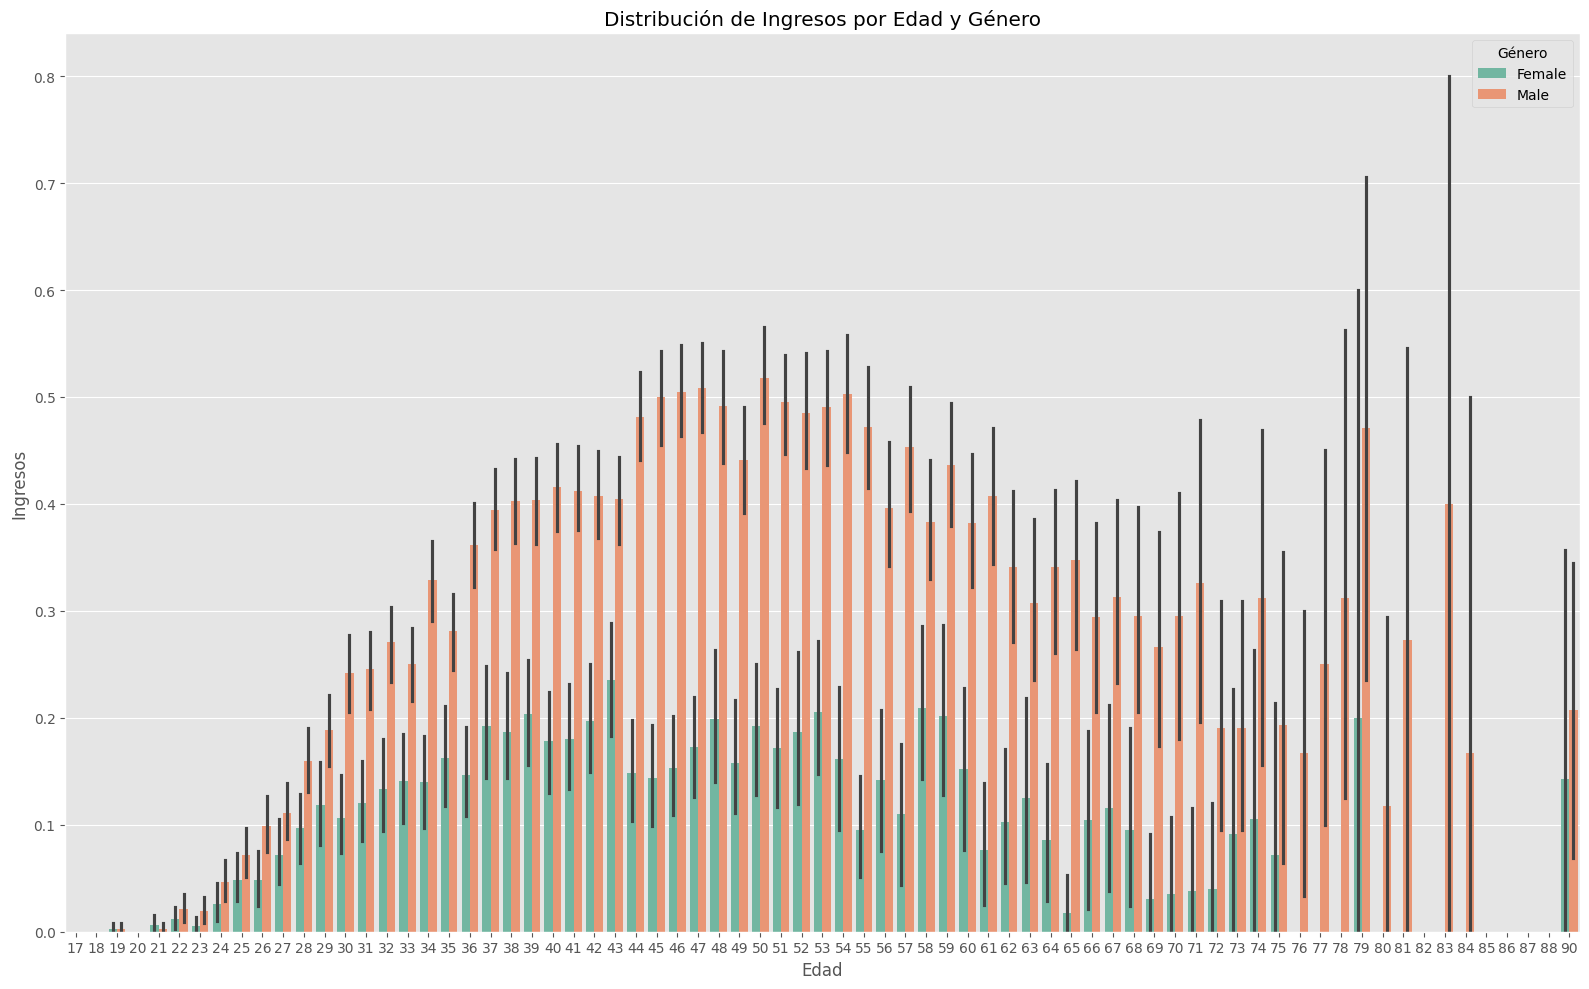

In [21]:
# Crear una figura y ejes
plt.figure(figsize=(16, 10))

# Gráfico de barras agrupado por 'age' y 'sex' con colores diferenciados por 'target'
sns.barplot(x='age', y='target', hue='sex', data=df, palette='Set2')

# Añadir títulos y etiquetas
plt.title('Distribución de Ingresos por Edad y Género')
plt.xlabel('Edad')
plt.ylabel('Ingresos')
plt.legend(title='Género')

# Ajustes de diseño para mostrar mejor la gráfica
plt.tight_layout()
plt.show()

### 2. Leemos archivo okcupid_profiles.csv

In [22]:
df = pd.read_csv("../data/okcupid_profiles.csv", sep=(','))
df.head(5)

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   education    53318 non-null  object 
 9   ethnicity    54266 non-null  object 
 10  height       59943 non-null  float64
 11  income       59946 non-null  int64  
 12  job          51748 non-null  object 
 13  last_online  59946 non-null  object 
 14  location     59946 non-null  object 
 15  offspring    24385 non-null  object 
 16  pets         40025 non-null  object 
 17  religion     39720 non-null  object 
 18  sign         48890 non-null  object 
 19  smok

In [24]:
df.duplicated().sum()

0

In [25]:
df.isnull().sum()

age                0
status             0
sex                0
orientation        0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
pets           19921
religion       20226
sign           11056
smokes          5512
speaks            50
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
dtype: int64

### a-Crear nuevo dataset llamado df_red con ciertas variables

In [26]:
columnas_seleccionadas = ["age", "status", "sex", "orientation", "body_type", "diet", "drinks", "height", "income", "job"]
df_red = df[columnas_seleccionadas]
df_red.head()

,age,status,sex,orientation,body_type,diet,drinks,height,income,job
0,22,single,m,straight,a little extra,strictly anything,socially,75.0,-1,transportation
1,35,single,m,straight,average,mostly other,often,70.0,80000,hospitality / travel
2,38,available,m,straight,thin,anything,socially,68.0,-1,NaN
3,23,single,m,straight,thin,vegetarian,socially,71.0,20000,student
4,29,single,m,straight,athletic,NaN,socially,66.0,-1,artistic / musical / writer


In [27]:
df_red.isnull().sum()

age                0
status             0
sex                0
orientation        0
body_type       5296
diet           24395
drinks          2985
height             3
income             0
job             8198
dtype: int64

### b- Transformar dataset  en dataset de clasificacion

El método apply junto con lambda  aplica una función a cada elemento de una Serie . Esto es útil cuando  se desea realizar operaciones personalizadas en tus datos y necesitas aplicar una función específica a cada elemento de una columna o fila.

In [28]:
# Creamos una nueva columna llamada 'is_stem' donde esta va ser nuestra target.
df_red["is_stem"] = df_red["job"].apply(lambda x: 1 if 'computer / hardware / software' in str(x).lower() or "science / tech / engineering" in str(x).lower() else 0)
df_red.head()

,age,status,sex,orientation,body_type,diet,drinks,height,income,job,is_stem
0,22,single,m,straight,a little extra,strictly anything,socially,75.0,-1,transportation,0
1,35,single,m,straight,average,mostly other,often,70.0,80000,hospitality / travel,0
2,38,available,m,straight,thin,anything,socially,68.0,-1,NaN,0
3,23,single,m,straight,thin,vegetarian,socially,71.0,20000,student,0
4,29,single,m,straight,athletic,NaN,socially,66.0,-1,artistic / musical / writer,0


In [29]:
df_red['is_stem'].unique()

array([0, 1], dtype=int64)

In [30]:
df_red[df_red['is_stem']== 1]

,age,status,sex,orientation,body_type,diet,drinks,height,income,job,is_stem
5,29,single,m,straight,average,mostly anything,socially,67.0,-1,computer / hardware / software,1
19,33,single,m,straight,athletic,mostly anything,socially,72.0,-1,science / tech / engineering,1
31,27,single,m,straight,athletic,anything,socially,72.0,-1,science / tech / engineering,1
32,38,single,f,straight,average,mostly anything,socially,67.0,-1,computer / hardware / software,1
36,32,single,m,straight,athletic,mostly anything,socially,69.0,-1,science / tech / engineering,1
...,...,...,...,...,...,...,...,...,...,...,...
59910,23,single,m,gay,thin,mostly anything,socially,67.0,-1,computer / hardware / software,1
59915,28,single,m,straight,NaN,NaN,socially,70.0,-1,computer / hardware / software,1
59920,22,single,f,straight,NaN,mostly anything,socially,68.0,-1,science / tech / engineering,1
59928,29,single,m,straight,average,mostly anything,socially,75.0,-1,science / tech / engineering,1


Eliminamos del dataset df_red la columna job después de crear la  columna is_stem

In [31]:
df_red.drop("job", axis=1, inplace=True)
df_red.head()

,age,status,sex,orientation,body_type,diet,drinks,height,income,is_stem
0,22,single,m,straight,a little extra,strictly anything,socially,75.0,-1,0
1,35,single,m,straight,average,mostly other,often,70.0,80000,0
2,38,available,m,straight,thin,anything,socially,68.0,-1,0
3,23,single,m,straight,thin,vegetarian,socially,71.0,20000,0
4,29,single,m,straight,athletic,NaN,socially,66.0,-1,0


## c. Una vez obtenido el DataFrame anterior. 

Calcular el porcentaje de instancias que trabajan en el ambito Stem.

El porcentaje de instancias del ambito Steam es del 15.94%



In [32]:
porcentaje_stem = df_red["is_stem"].mean() * 100
print(f"Porcentaje de personas que trabajan en STEM: {porcentaje_stem:.2f}%")

Porcentaje de personas que trabajan en STEM: 15.94%


Creamos dataset nuevo considerando todas las variables del df_red menos is_stem, borramos is _stem y Creamos un pandas serie llamado 'y' a partir del df_red con solo valores de la variable is_stem.

In [33]:
y_column = "is_stem"
X = df_red[[c for c in df_red.columns if c != y_column]]
y = df_red[y_column]
X

,age,status,sex,orientation,body_type,diet,drinks,height,income
0,22,single,m,straight,a little extra,strictly anything,socially,75.0,-1
1,35,single,m,straight,average,mostly other,often,70.0,80000
2,38,available,m,straight,thin,anything,socially,68.0,-1
3,23,single,m,straight,thin,vegetarian,socially,71.0,20000
4,29,single,m,straight,athletic,NaN,socially,66.0,-1
...,...,...,...,...,...,...,...,...,...
59941,59,single,f,straight,NaN,NaN,socially,62.0,-1
59942,24,single,m,straight,fit,mostly anything,often,72.0,-1
59943,42,single,m,straight,average,mostly anything,not at all,71.0,100000
59944,27,single,m,straight,athletic,mostly anything,socially,73.0,-1


In [34]:
y

0        0
1        0
2        0
3        0
4        0
        ..
59941    0
59942    0
59943    0
59944    0
59945    0
Name: is_stem, Length: 59946, dtype: int64

In [35]:
X.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


### d. Utilizamos el método de Scikit_learn llamado Train_Test_Split para crear dos DataFrames X_train y X_test y dos Series Y_train e Y_test.

Para poder hacer el entrenamiento tenemos que transformar las variables categoricas a númericas y normalizar las variables numericas.

In [36]:
# Lista de columnas para hot encoding
columns_to_encode = ['body_type','status','orientation','sex','diet', 'drinks']
enc = OrdinalEncoder()
X_hot_enconder = X[columns_to_encode]
X_hot_enconder = enc.fit_transform(X_hot_enconder)
X.loc[:, columns_to_encode] = X_hot_enconder


In [37]:
columns_to_normalize = ['age', 'height', 'income']
another_columns = [c for c in X.columns if c not in columns_to_normalize]

df_normalized = X.copy()
scaler = MinMaxScaler(feature_range=(0, 1))

# Ajustar y transformar
df_normalized[columns_to_normalize] = scaler.fit_transform(df_normalized[columns_to_normalize])

# Restaurar las columnas que no se normalizaron
df_normalized[another_columns] = X[another_columns]

In [38]:
df_normalized

,age,status,sex,orientation,body_type,diet,drinks,height,income
0,0.043478,3.0,1.0,2.0,0.0,10.0,4.0,0.787234,0.000000
1,0.184783,3.0,1.0,2.0,2.0,6.0,2.0,0.734043,0.080001
2,0.217391,0.0,1.0,2.0,10.0,0.0,4.0,0.712766,0.000000
3,0.054348,3.0,1.0,2.0,10.0,17.0,4.0,0.744681,0.020001
4,0.119565,3.0,1.0,2.0,1.0,NaN,4.0,0.691489,0.000000
...,...,...,...,...,...,...,...,...,...
59941,0.445652,3.0,0.0,2.0,NaN,NaN,4.0,0.648936,0.000000
59942,0.065217,3.0,1.0,2.0,4.0,3.0,2.0,0.755319,0.000000
59943,0.260870,3.0,1.0,2.0,2.0,3.0,1.0,0.744681,0.100001
59944,0.097826,3.0,1.0,2.0,1.0,3.0,4.0,0.765957,0.000000


In [39]:
#El tamaño del conjunto de test deberá ser el 30% del tamaño del dataset original. La semilla de números aleatorios deberá ser igual a 42. 
# por defecto hace de manera estratificada el train_test_split pero lo especificamos para que sea lo más similar posible en el is_stem
X_train, X_test, y_train, y_test= train_test_split(df_normalized, y, test_size=0.3, random_state=42, stratify=y) 
print(X_train.shape, X_test.shape, y_train.shape[0], y_test.shape[0])

(41962, 9) (17984, 9) 41962 17984


### e. Comprobar que las proporciones de instancias que trabajan en el ámbito STEM en el subconjunto de entrenamiento y en el subconjunto de test son similares

Hemos comprobado que las proporciones si son similares

In [40]:
y_train.sum()/y_train.count()

0.15942996044039845

In [41]:
y_test.sum()/y_test.count()

0.15941948398576514

### ¿Son las distribuciones del conjunto de test iguales a las del conjunto de entrenamiento en todos los casos?

Las distribuciones no en todos casos son iguales depende de los datos, consistencia, aleatoriedad y por ejemplo proporción de división.

Pero en este caso , como se puede ver en las graficas siguientes si que tienen la misma distribución.


### Representación grafica de las variables que utilizamos para hacer el Train y el Test  Normalizadas y No normalizadas


Creamos dos nuevos datasets con el Train  y el Test para destransformar las variables categoricas y poder representarlas graficamente

In [42]:
# Hemos creado una copia del dataset X_train y X_test para poder visualizar mejor los datos.
X_train_to_vizualize = X_train.copy()
X_test_to_vizualize = X_test.copy()
X_train_to_vizualize[columns_to_encode] = enc.inverse_transform(X_train_to_vizualize[columns_to_encode])
X_test_to_vizualize[columns_to_encode] = enc.inverse_transform(X_test_to_vizualize[columns_to_encode])

X_train_to_vizualize[columns_to_normalize] = scaler.inverse_transform(X_train_to_vizualize[columns_to_normalize])
X_test_to_vizualize[columns_to_normalize] = scaler.inverse_transform(X_test_to_vizualize[columns_to_normalize])

X_test_to_vizualize.head()

,age,status,sex,orientation,body_type,diet,drinks,height,income
10153,25.0,single,m,straight,fit,mostly anything,socially,67.0,-1.0
37254,28.0,single,m,straight,average,strictly anything,socially,74.0,20000.0
34070,36.0,single,m,straight,fit,strictly anything,often,71.0,-1.0
836,21.0,single,m,straight,NaN,NaN,socially,68.0,-1.0
1410,27.0,single,f,straight,athletic,NaN,socially,67.0,-1.0


Hemos hecho una función visualize_column para poder visualizar una columna en concreto ya que se representarian con el mismo grafico

In [50]:
def visualize_column(column_name):
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

    # Primer gráfico para datos normalizados
    axes[0].hist(X_train[column_name], bins=10, alpha=0.7, label='X_train', color='red')
    axes[0].hist(X_test[column_name], bins=10, alpha=0.7, label='X_test', color='black')
    axes[0].set_title(f'{column_name.capitalize()} Test vs Train (Normalized)')
    axes[0].set_xlabel(column_name.capitalize())
    axes[0].set_ylabel('Frequency')
    axes[0].legend(loc='upper right')

    # Segundo gráfico para datos no normalizados
    axes[1].hist(X_train_to_vizualize[column_name], bins=10, alpha=0.7, label='X_train', color='red')
    axes[1].hist(X_test_to_vizualize[column_name], bins=10, alpha=0.7, label='X_test', color='black')
    axes[1].set_title(f'{column_name.capitalize()} Test vs Train (No Normalized)')
    axes[1].set_xlabel(column_name.capitalize())
    axes[1].set_ylabel('Frequency')
    axes[1].legend(loc='upper right')

    # Ajustamos el espacio entre subgráficos para evitar superposiciones
    plt.tight_layout()
    plt.show()

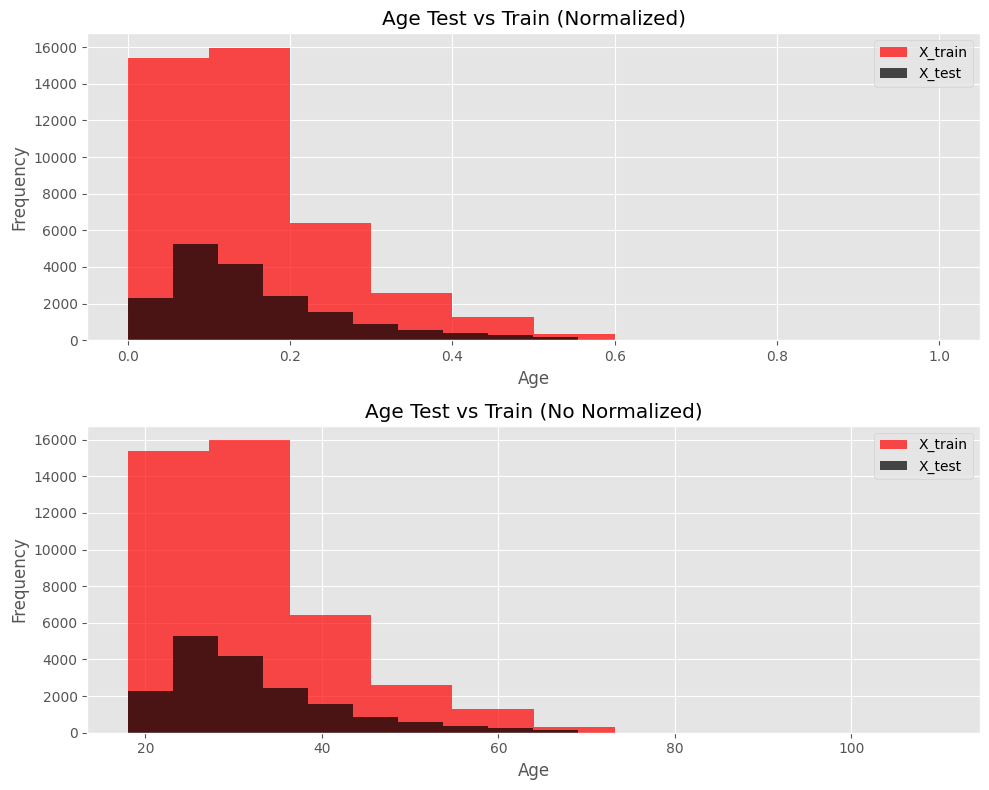

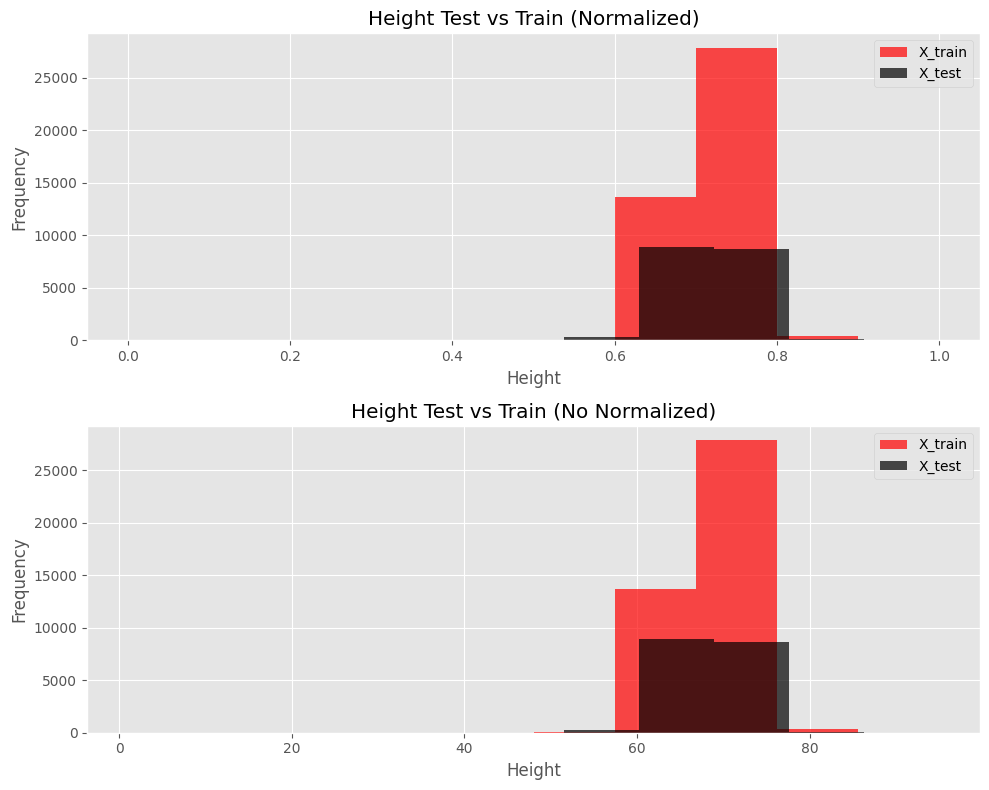

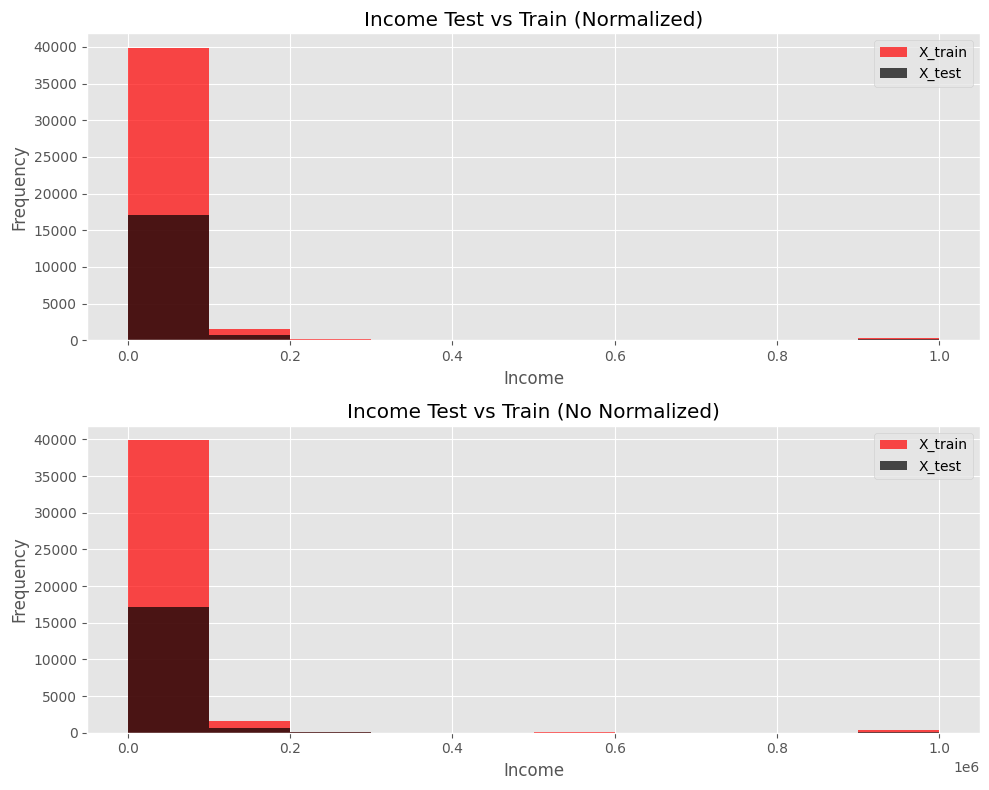

In [51]:
visualize_column('age')
visualize_column('height')
visualize_column("income")

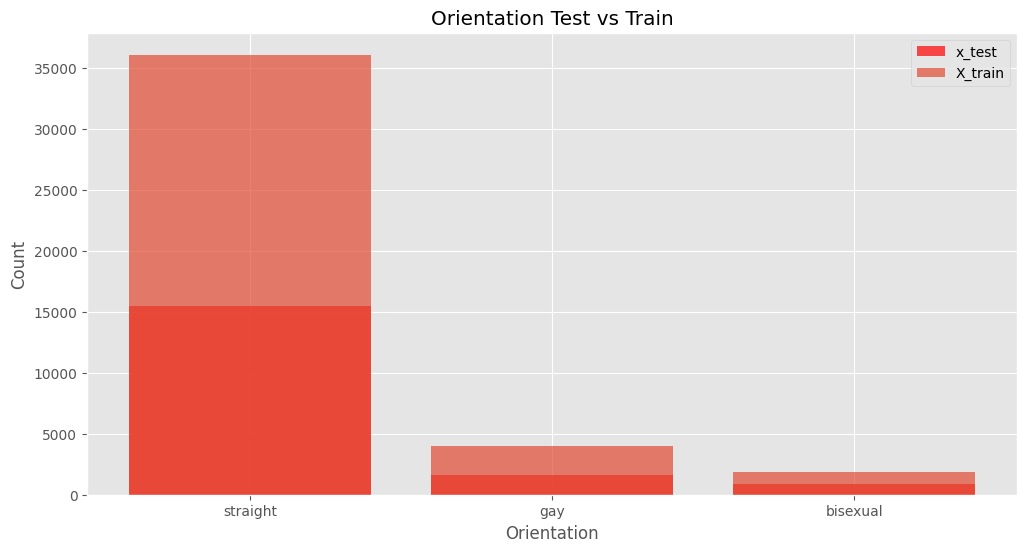

In [45]:
orientation_counts_test = X_test_to_vizualize['orientation'].value_counts()
orientation_counts_train = X_train_to_vizualize['orientation'].value_counts()

# Crear un gráfico de barras para x_test
plt.bar(
    orientation_counts_test.index,
    orientation_counts_test,
    alpha=0.7,
    label='x_test',
    color='red'
)

# Crear un gráfico de barras para X_train
plt.bar(
    orientation_counts_train.index,
    orientation_counts_train,
    alpha=0.7, 
    label='X_train')

plt.xlabel('Orientation')
plt.ylabel('Count')
plt.title('Orientation Test vs Train')
plt.legend(loc='upper right')

plt.show()

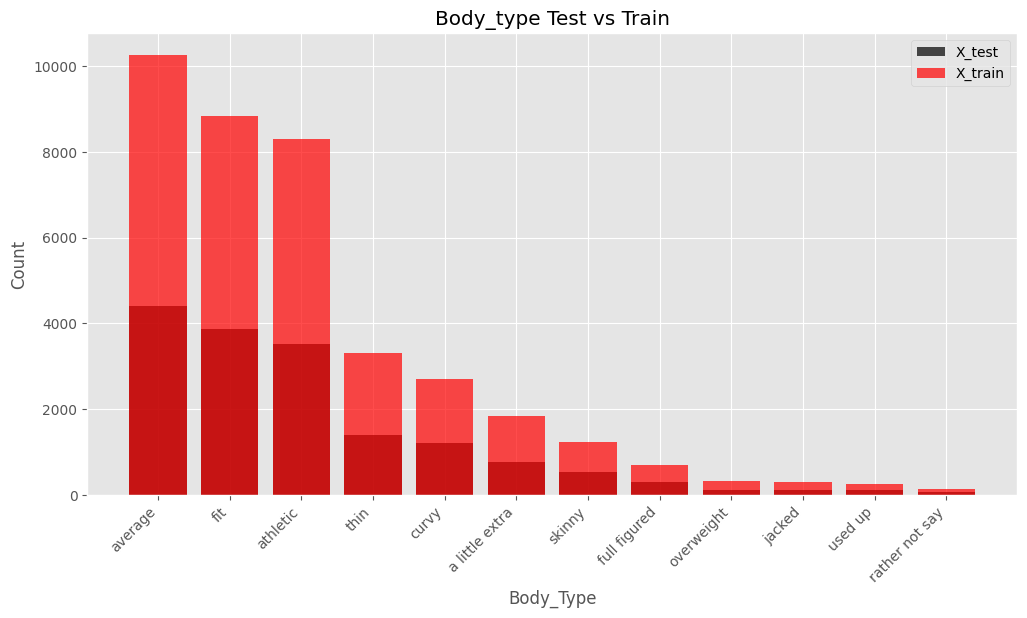

In [46]:
body_type_count_test = X_test_to_vizualize['body_type'].value_counts()
body_type_count_train = X_train_to_vizualize['body_type'].value_counts()
plt.bar(body_type_count_test.index, body_type_count_test, alpha=0.7, label='X_test', color= 'black')

plt.bar(body_type_count_train.index, body_type_count_train, alpha=0.7, label='X_train', color='red')
        
# Agregar etiquetas y leyenda

plt.xlabel('Body_Type')
plt.ylabel('Count')
plt.title('Body_type Test vs Train')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right') 
plt.show()

# ¿Hace falta que las dos distribuciones sean iguales en todos los casos?

Si que hace falta, si los datos de entrenamiennto no son proporcionales en varianza en cuanto a todas las variables no se podra hacer una buena comprobación del modelo obtenido.

### ¿Qué consideraciones deberemos tomar para no obtener métricas distorsionadas respecto de la realidad?


Obtener métricas precisas y representativas es fundamental para tomar decisiones informadas y comprender correctamente la realidad.

Definición clara de objetivos: Antes de recopilar datos y métricas, asegúrarse de tener una comprensión clara de los objetivos que se esta tratando de medir,definir claramente qué indicadores son importantes y relevantes para el análisis.

Transparencia y comunicación: Comunicar de manera transparente cómo se recopilaron y calcularon las métricas. La transparencia facilita la comprensión y la confianza en los resultados.

### Que pasa cuando se representan el entrenamiento con los datos sin normalizar?

Cuando se representan datos sin normalizar, puede haber  implicaciones que afectan la interpretación y comparación de las métricas. Las variables con diferentes escalas pueden tener un impacto desigual en los resultados del análisis. Al no normalizar, las variables con valores numéricos más grandes pueden dominar y tener un peso excesivo en comparación con las variables de escala más pequeña. Las variables con diferentes escalas pueden tener un impacto desigual en los resultados del análisis. 

la normalización es un paso importante en el preprocesamiento de datos que puede mejorar la consistencia y la interpretabilidad de los resultados en análisis estadísticos y modelos de aprendizaje automático. Sin embargo, es importante señalar que no siempre es necesario normalizar en todos los casos, y la decisión puede depender del contexto específico y los objetivos del análisis.